## 相参积累检测器ROC曲线
考虑如下检测问题
\begin{aligned}
    H_0 &: \boldsymbol{x} = \boldsymbol{w}\\
    H_1 &: \boldsymbol{x} = \boldsymbol{s} + \boldsymbol{w}\\
\end{aligned}
其中$\boldsymbol{s} = s_0\mathbf{1}_N\in\mathbb{R}^{N}$为固定幅度目标，$\boldsymbol{w}$的分量$w_i$独立同分布于$\mathcal{N}(0,\sigma_n^2)$. 使用相参积累检测器对该问题进行检测则有如下关系
\begin{equation*}
    P_{d} = Q\left( Q^{-1}\left(P_{fa} \right) - \sqrt{N}\sqrt{SNR} \right)
\end{equation*}
其中$SNR = \frac{s_0^2}{\sigma_n^2}$.

In [1]:
from scipy import special as sp
import numpy as np

def qfuncinv(y):
    return np.sqrt(2) * sp.erfinv(1 - 2 * y)

def qfunc(x):
    return 0.5 - 0.5 * sp.erf(x / np.sqrt(2))

def coherentPd(pfa, snrdb, numPulses):
    snr = np.power(10, snrdb/10)
    return qfunc(qfuncinv(pfa) - np.sqrt(numPulses * snr))

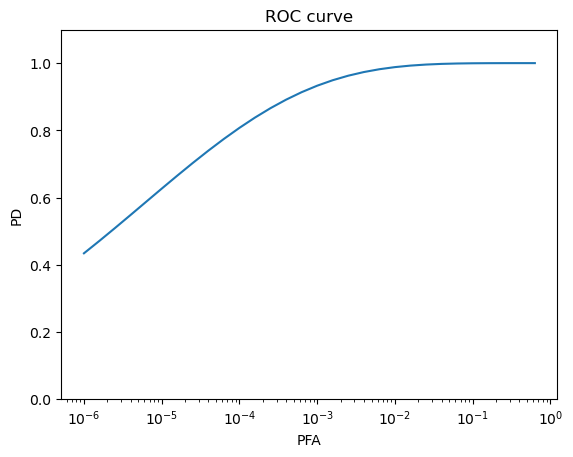

In [2]:
## 相参积累检测器的检测性能
K = 8 #积累脉冲个数
pfa = np.power(10,np.arange(-6.,0.,0.2)) #虚警率
snrdb = 4.2 #输入信噪比
pd = []
for i in range(0,len(pfa)):
    pd_result = coherentPd(pfa[i], snrdb, K)
    pd.append(pd_result)

# 画图
import matplotlib.pyplot as plt
plt.semilogx(pfa, pd, '-')  # '*'表示标记点，'-'表示连接线

# 添加标题和标签
plt.title('ROC curve')
plt.xlabel('PFA')
plt.ylabel('PD')
plt.ylim(0,1.1)

# 显示图例
# plt.legend(['Coherent Detector'])

# 显示图表
plt.show()

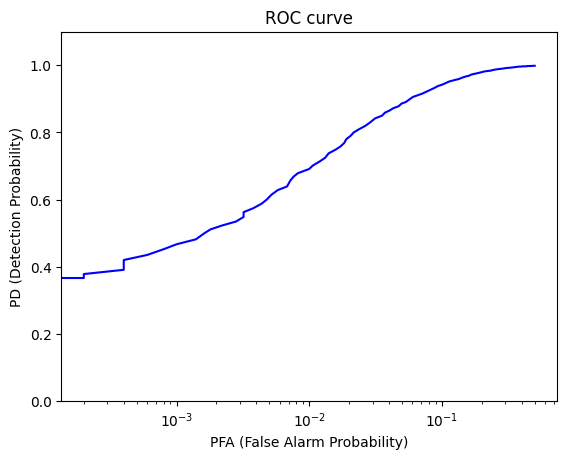

PRF和PD数据已保存到文件: prf_pd_data.npz


In [16]:
import numpy as np
import matplotlib.pyplot as plt

K = 8  # 积累脉冲个数
N = 10000  # 样本个数

# 生成数据：N个样本，每个样本K个特征
snrdb = 1  # 输入信噪比
random_data = np.random.randn(N // 2, K)  # 噪声数据
signal_data = np.random.randn(N // 2, K) + 1  # 带噪声信号数据

# 将每个样本的 8 个通道数据相加
random_data_sum = np.sum(random_data, axis=1)  # 噪声的通道相加
signal_data_sum = np.sum(signal_data, axis=1)  # 信号的通道相加

# 合并噪声数据和信号数据
X = np.concatenate((random_data_sum, signal_data_sum))  # 一维数组表示总信号值

# 生成标签
y = np.zeros(N)  # 初始化标签
y[N // 2:] = 1  # 前 N/2 为噪声（0），后 N/2 为信号（1）

# 打乱数据和标签
indices = np.arange(N)
np.random.shuffle(indices)  # 随机打乱索引
X = X[indices]
y = y[indices]

# 用于存储检测率和虚警率
lPd = []
lPfa = []

# 设置门限
thresholds = np.arange(0, max(X), 0.1)  # 动态调整门限，步长为 0.1
# 遍历每个门限值
for threshold in thresholds:
    predicted = (X > threshold).astype(int)  # 按门限检测，输出0或1
    true_positives = np.sum((predicted == 1) & (y == 1))  # 正确检测的信号数
    false_positives = np.sum((predicted == 1) & (y == 0))  # 错误检测的噪声数
    total_positives = np.sum(y == 1)  # 总信号数
    total_negatives = np.sum(y == 0)  # 总噪声数

    Pd = true_positives / total_positives  # 检测率
    Pfa = false_positives / total_negatives  # 虚警率

    # 存储每个门限值的 Pd 和 Pfa
    lPd.append(Pd)
    lPfa.append(Pfa)

# 画图
plt.semilogx(lPfa, lPd, linestyle='-', color='b')

# 添加标题和标签
plt.title('ROC curve')
plt.xlabel('PFA (False Alarm Probability)')
plt.ylabel('PD (Detection Probability)')
plt.ylim(0, 1.1)

# 显示图表
plt.show()

# 创建文件保存数据PD和PFA
# 将数据保存为 .npz 文件
filename = "prf_pd_data.npz"
np.savez(filename, pfa=lPfa, pd=lPd)
print(f"PRF和PD数据已保存到文件: {filename}")
